<p align="left">
  <img src="./logo_UTN.svg" />
</p>


# **Teoría de Circuitos II - R4001 - 2023**
## Trabajo Semanal 1
### Autor: Bruno Glecer

## Consigna

La tarea semanal consiste en realizar un analisis del siguiente circuito

<div>
    <img src="circuito.png" width="1000"/>
</div>

Se piden las siguientes consignas:

1. Hallar la transferencia $T = \frac{V_o}{V_i}$ en función de $\omega_0$ y $Q$
2. Obtener el valor de los componentes del circuito de forma tal que $\omega_0 = 1$ y $Q = 3$
3. Ajustar el valor de $R_1$ de forma tal que $\left|T(0)\right| = 20 db$
4. (Bonus) Obtener los valores de la red normalizados en frecuencia e impedancia.
5. (Bonus) Calcular las sensibilidades $S^{\omega_0}_C$, $S^{Q}_{R_2}$ y $S^{Q}_{R_3}$
6. (Bonus) Recalcular los valores de la red para que cumpla con una transferencia Butterworth.
7. (Bonus) Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).
8. (Bonus) Simulación circuital de todos los experimentos.


In [7]:
from sympy import solve, symbols, Eq


#Variables conocidas
R1, R2, R3, R4, C1, s = symbols("R1 R2 R3 R4 C s")

#Variables desconocidas
H, Vi, Vo, I1, I2, I3, I4, I5, I6, Va, Vb = symbols("H Vi Vo I1 I2 I3 I4 I5 I6 Va Vb")
unknowns = [H, Vi, Vo, I1, I2, I3, I4, I5, I6, Va, Vb]

equations = []

#Ecuaciones de mallas
equations.append(Eq(Vi, I6*R1))
equations.append(Eq(-Va, R2*I1))
equations.append(Eq(-Va, I2*1/(C*s)))
equations.append(Eq(Va, I3*R3))
equations.append(Eq(-Vb, I3*1/(C*s)))
equations.append(Eq(Vb, R4*I4))
equations.append(Eq(-Vo, I4*R4))
equations.append(Eq(Vo, R3*I5))

#Ecuaciones de nodos
equations.append(Eq(I6 + I5, I1 + I2))

#Relacion de H con tensiones
equations.append(Eq(H, Vo/Vi))

#Resolver
sol_H = solve(equations, unknowns, dict=True)[0][H]


sol_H

-R2*R3/(R1*(C**2*R2*R3**2*s**2 + C*R3**2*s + R2))

## Cálculos

### Deducción de función de transferencia

Para simplificar el analisis se asumirá que los op-amps se encuentran en equilibrio y su ganancia es arbitrariamente alta. En otras palabras la tensión de entrada diferencial se asumirá que es cero.

Primero, le asignamos nombre a todas las corrientes y tensiones desconocidas en el circuito.





## Gráficos

A continuación se proporcionan gráficos de la función de transferencia normalizada con los valores $R_1 = R_2 = 1$

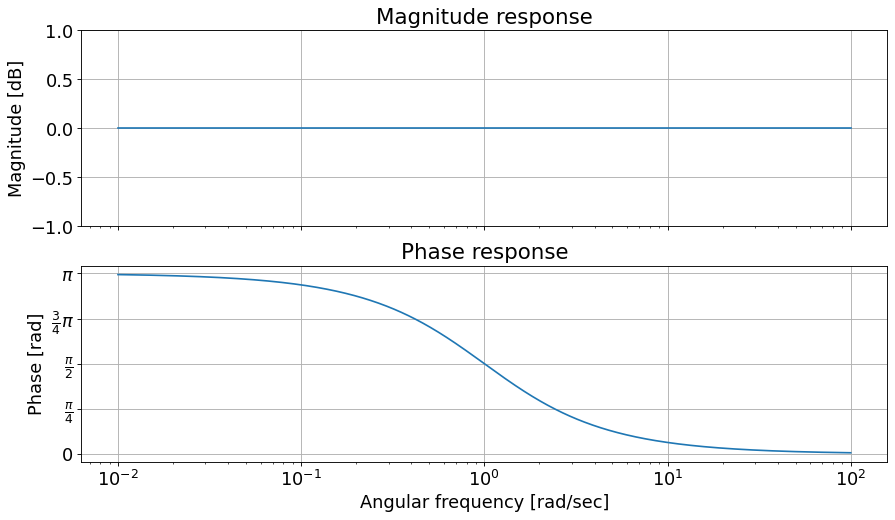

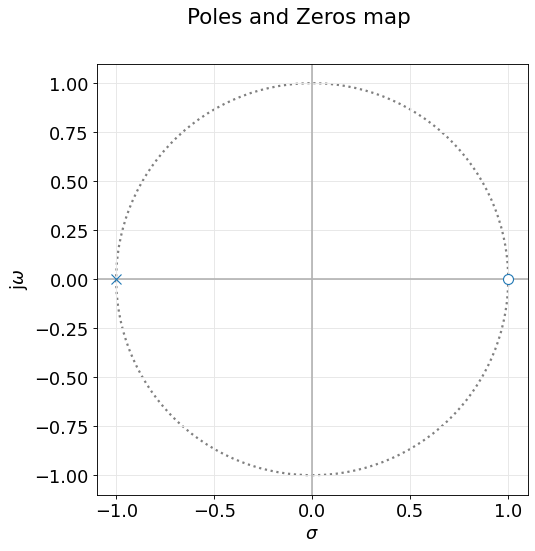

In [1]:
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal as sig

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#Configuracion del circuito
w0 = 1

#Funcion de transferencia
tf_num = np.array([1, -w0])
tf_den = np.array([1, w0])
tf_H = sig.TransferFunction(tf_num, tf_den)

#Bode plot de la libreria pytc2
_, axes_hdl = bodePlot(tf_H)

plt.sca(axes_hdl[0])
plt.ylim([-1,1])

#Diagrama de polos y ceros de la libreria pytc2
pzmap(tf_H)

plt.show()

El diagrama de módulo es el esperado, una respuesta plana con 0db de ganancia. El gráfico de fase muestra que el filtro produce un defasaje de 180° para frecuencias bajas y no produce ningun defasaje para frecuencias altas. El punto de inflexión ocurre en $\omega_0$.

El diagrama de polos y ceros muestra un polo en $\$=-1$ y un cero en $\$=1$ tal como se esperaba.

A continuación también se proporcionan gráficos 3D de la función de transferencia.

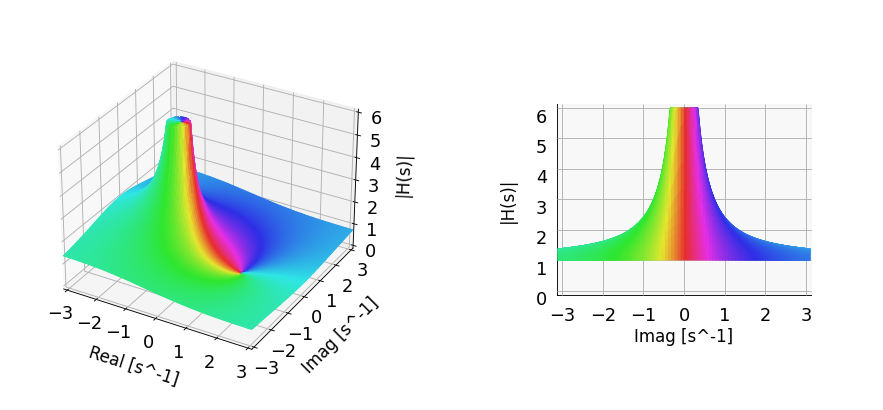

In [2]:
from matplotlib import colors

#Convierto la funcion de trnasferenica en una funcion que python puede evaluar
def H(s):
    ret = 1
    for z in tf_H.zeros:
        ret *= (s - z)
    for p in tf_H.poles:
        ret /= (s - p)    
    return ret

res = 200

srpoints = np.linspace(-3.1*w0, 3.1*w0, 2*res) #Puntos de frecuencia compleja para el grafico completo
sipoints = np.linspace(-3.1*w0, 3.1*w0, 2*res)
srpoints, sipoints = np.meshgrid(srpoints, sipoints)

srpoints2 = np.linspace(-3.1*w0, 0, res) #Puntos de frecuencia compleja para el grafico cortado
sipoints2 = np.linspace(-3.1*w0, 3.1*w0, 2*res)
srpoints2, sipoints2 = np.meshgrid(srpoints2, sipoints2)

fig = plt.figure(figsize = (14,14)) #Figura de matplotlib
ax1 = fig.add_subplot(1, 2, 1, projection='3d')#Grafico H(s) completo
ax2 = fig.add_subplot(1, 2, 2, projection='3d', proj_type = 'ortho')#Grafico H(s) cortado (render ortografico)

#Grafico 1 init
ax1.set_xlabel('Real [s^-1]', fontsize=15)
ax1.set_ylabel('Imag [s^-1]', fontsize=15)
ax1.set_zlabel('|H(s)|', fontsize=15)
ax1.set_zlim(0, 6)
ax1.set_xlim(-3*w0, 3*w0)
ax1.set_ylim(-3*w0, 3*w0)
ax1.xaxis.labelpad=15
ax1.yaxis.labelpad=15
ax1.zaxis.labelpad=10

#Grafico 2 init
ax2.set_xlim(-3*w0, 1*w0)
ax2.set_ylim(-3*w0, 3*w0)
ax2.set_zlim(0, 6)
ax2.set_xticks([])
#ax2.set_xlabel('Real [s^-1]', fontsize=15)
ax2.set_ylabel('Imag [s^-1]', fontsize=15)
ax2.set_zlabel('|H(s)|', fontsize=15)
ax2.yaxis.labelpad=20
ax2.zaxis.labelpad=15


#Componentes de la funcion H(s) para graficar
Hsabs = lambda r, i: abs(H(r + 1j*i))# |H(r, i)|
Hsarg = lambda r, i: np.angle(H(r + 1j*i)) #arg(H(r, i))

#Altura del grafico
Z = np.array([Hsabs(x, y) for x,y in zip(srpoints,sipoints)])#Puntos de H(s)
Z = np.clip(Z, 0, 6)#Recorto

#Colores del grafico
hue = np.array([Hsarg(x, y) for x,y in zip(srpoints,sipoints)]) #El hue depende de la fase
sat = 0.6*np.ones(Z.shape)#La sat y el val son fijos
val = 0.8*np.ones(Z.shape)

hue = hue/(hue.max())#Normalizo y arreglo algunas cosas y paso a RGB
norm = colors.Normalize()
rgb_colors = colors.hsv_to_rgb(norm(np.moveaxis(np.array([hue, sat, val]), 0, 2)))

ax1.set_box_aspect(aspect=None, zoom=0.85)

ax2.view_init(0, 0, 0)

ax1.plot_surface(srpoints, sipoints, Z, cmap="plasma", facecolors=rgb_colors, rstride=5, cstride=5)#Grafico H(s)
ax2.plot_surface(srpoints2, sipoints2, np.array_split(Z, 2, axis=1)[0], cmap="plasma" , facecolors=rgb_colors,rstride=5, cstride=5)#Grafico H(s) sigma<0


El grafico izquiero muestra la funcion de transferencia $H(s)$ usando la altura para representar el modulo y el color para representar la fase. De esta forma se puede apreciar la naturaleza compleja de la transfernica, y quedan bien marcados el polo y el cero. El grafico derecho muestra lo mismo pero visto de costado y cortada por el eje $j\omega$, asi se puede observar la respuesta en frecuencia plana.

## Simulacion

### Circuito armado en LTSpice
<div>
    <img src="sim_sch.png" width="500"/>
</div>

### Resultado del analisis en AC


<div>
    <img src="sim_plt.png" width="800"/>
</div>

### Conclusiones

La respuesta del circuito simulada en LTSpice es la esperada y coincide con el gráfico producido en Python. La pequeña disminución de ganancia en las frecuencias altas es debido a los comportamientos no ideales del modelo del opamp usado en LTSpice.



## Verificacion con SymPy

In [3]:
from sympy import solve, symbols, Eq


#Variables conocidas
R1, R2, R3, C1, s = symbols("R1 R2 R3 C1 s")

#Variables desconocidas
H, V1, V2, Vx, IR1, IR2, IR3, IC1 = symbols("H V1 V2 Vx IR1 IR2 IR3 IC1")
unknowns = [H, V1, V2, Vx, IR1, IR2, IR3, IC1]

equations = []

#Ecuaciones de mallas
equations.append(Eq(V1 - Vx, R1*IR1))
equations.append(Eq(Vx - V2, R2*IR2))
equations.append(Eq(Vx, R3*IR3))
equations.append(Eq(V1 - Vx, IC1/(C1 * s)))

#Ecuaciones de nodos
equations.append(Eq(IR1, IR2))
equations.append(Eq(IC1, IR3))

#Relacion de H con tensiones
equations.append(Eq(H, V2/V1))

#Resolver
sol_H = solve(equations, unknowns, dict=True)[0][H]


sol_H

(C1*R1*R3*s - R2)/(R1*(C1*R3*s + 1))

SymPy produjo como resultado una función de transferencia equivalente a la que veniamos trabajando

$$ H(s) = \frac{C_1 R_1 R_3 s - R_2}{R_1 \left( C_1 R_3 s + 1 \right)} = \frac{C_1 R_1 R_3 s - R_2}{R_1 C_1 R_3 s + R_1} =  \frac{C_1 R_3 s - \frac{R_2}{R_1}}{C_1 R_3 s + 1} =  \frac{s - \frac{R_2}{R_1}\frac{1}{C_1 R_3}}{s + \frac{1}{C_1 R_3}} $$

### Gráfico de la función de transferencia con SymPy

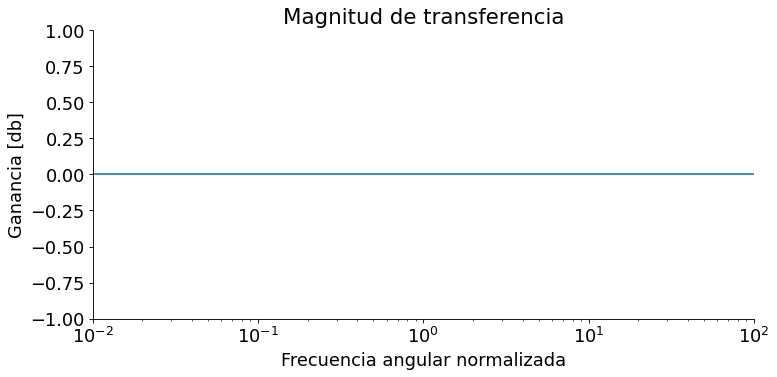

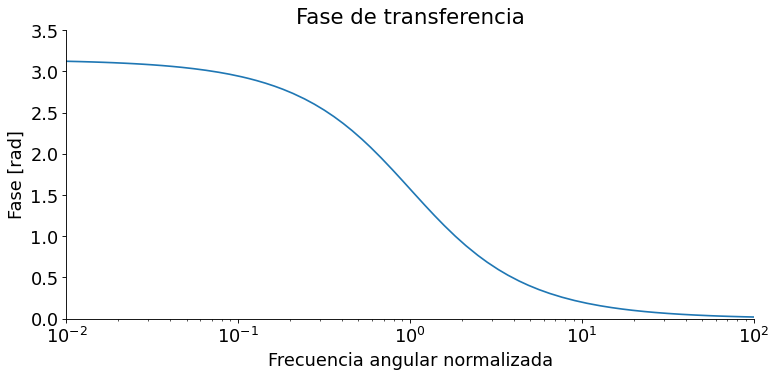

In [4]:
from sympy.plotting import plot
from sympy import I, arg, log

x = symbols('x')

plot_H = sol_H.subs({R1:1, R2:1, R3:1, C1:1, s:x*I})

gain_db_H = 20*log(abs(plot_H), 10)
phase_H = arg(plot_H)


p1 = plot(gain_db_H, (x, 0.01, 100), xscale='log', xlim=(0.01, 100), ylim=(-1, 1),
          xlabel="Frecuencia angular normalizada", ylabel="Ganancia [db]", title="Magnitud de transferencia",
          axis_center=(0.01, -1), size=(10, 5))

p2 = plot(phase_H, (x, 0.01, 100), xscale='log', xlim=(0.01, 100), ylim=(0, 3.5),
          xlabel="Frecuencia angular normalizada", ylabel="Fase [rad]", title="Fase de transferencia",
          axis_center=(0.01, 0), size=(10, 5))

Los gráficos producidos con SymPy también confirman que se trata de un filtro pasa todo en tensión.

## Conclusión

Este tipo de filtro al no afectar la ganancia de la señal puede servir para producir un defasaje de 180° para ciertas frecuencias, o si se sintoniza bien puede servir para producir un defasaje de, por ejemplo 90° para una frecuencia en especifico.